In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('titanic_train.csv')  # read the data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83

In [4]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

print(data.shape)

(891, 12)


In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Doharr, Mr. Tannous",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Lets Deal with Null Values
data['Cabin']=data['Cabin'].fillna(method='bfill')
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
data=data.dropna()
data.shape

(888, 12)

In [8]:
data.describe(include='all') # check again 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,888.000000,888.000000,888.000000,888,888,888.000000,888.000000,888.000000,888,888.000000,888,888
unique,NaN,NaN,NaN,888,2,NaN,NaN,NaN,679,NaN,147,3
top,NaN,NaN,NaN,"Doharr, Mr. Tannous",male,NaN,NaN,NaN,1601,NaN,C78,S
freq,NaN,NaN,NaN,1,576,NaN,NaN,NaN,7,NaN,33,644
mean,445.498874,0.382883,2.310811,NaN,NaN,29.650804,0.524775,0.382883,NaN,32.124098,NaN,NaN
std,256.708043,0.486364,0.834850,NaN,NaN,12.975435,1.104186,0.807113,NaN,49.718783,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.750000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.917700,NaN,NaN
50%,445.500000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,667.250000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
#first drop unnessesary column 
data=data.drop(columns=['Name','Ticket','PassengerId'],axis=1)

In [10]:
data.shape

(888, 9)

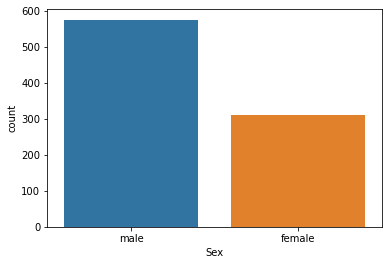

In [11]:
#plot each class frequency
sns.countplot(x='Sex',data=data)
plt.show()

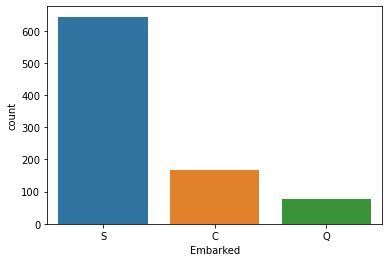

In [12]:
#plot each class frequency
sns.countplot(x='Embarked',data=data)
plt.show()

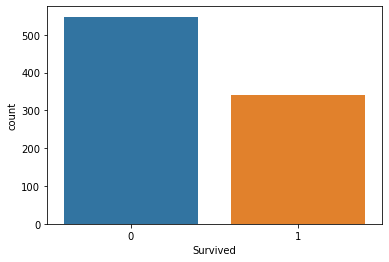

In [13]:
sns.countplot(x='Survived',data=data)
plt.show()

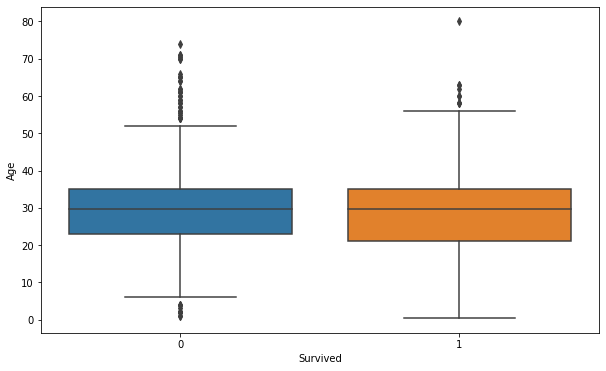

In [14]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Age', x ='Survived', data = data)
plt.show()

In [15]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Sex', 'Cabin', 'Embarked']

In [16]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
df=label.fit_transform(data["Sex"]) 
pd.Series(df)
data["Sex"]=df

In [17]:
df=label.fit_transform(data["Cabin"]) 
pd.Series(df)
data["Cabin"]=df

In [18]:
df=label.fit_transform(data["Embarked"]) 
pd.Series(df)
data["Embarked"]=df

In [19]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,81,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,55,2


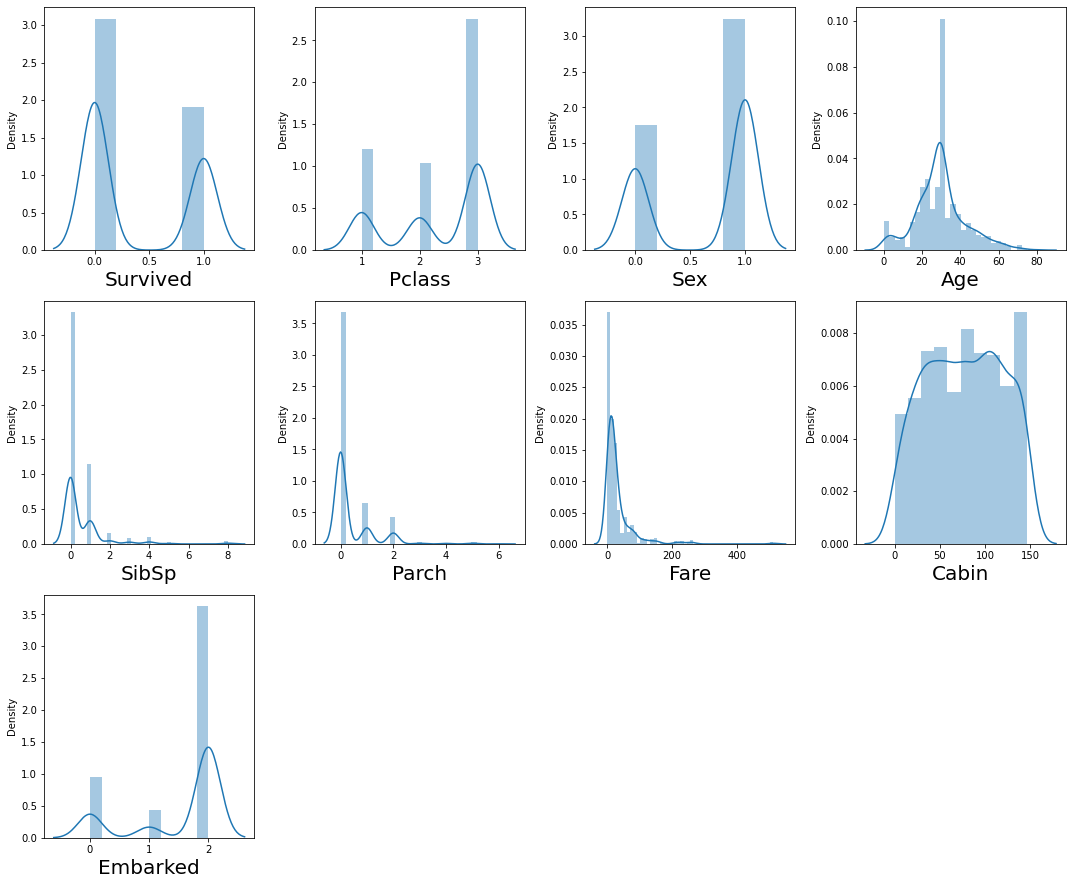

In [20]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [21]:
data.skew()

Survived    0.482690
Pclass     -0.635215
Sex        -0.623807
Age         0.432108
SibSp       3.688909
Parch       2.743180
Fare        4.799171
Cabin      -0.041284
Embarked   -1.263574
dtype: float64

In [22]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.78767884, 0.82598991, 0.73598007, ..., 0.50057773, 0.09560732,
        0.58589913],
       [1.26955296, 1.57100042, 1.35873244, ..., 0.78805769, 0.09560732,
        1.93972429],
       [1.26955296, 0.82598991, 1.35873244, ..., 0.48699373, 0.52444377,
        0.58589913],
       ...,
       [1.26955296, 1.57100042, 1.35873244, ..., 0.04274633, 1.12064675,
        0.58589913],
       [0.78767884, 0.82598991, 1.35873244, ..., 0.17456152, 0.40520318,
        0.58589913],
       [1.26955296, 1.57100042, 0.73598007, ..., 0.04274633, 0.40520318,
        1.93972429]])

In [23]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,81,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,55,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,129,2
...,...,...,...,...,...,...,...,...,...
884,0,3,1,25.000000,0,0,7.0500,30,2
886,0,2,1,27.000000,0,0,13.0000,30,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,60,2


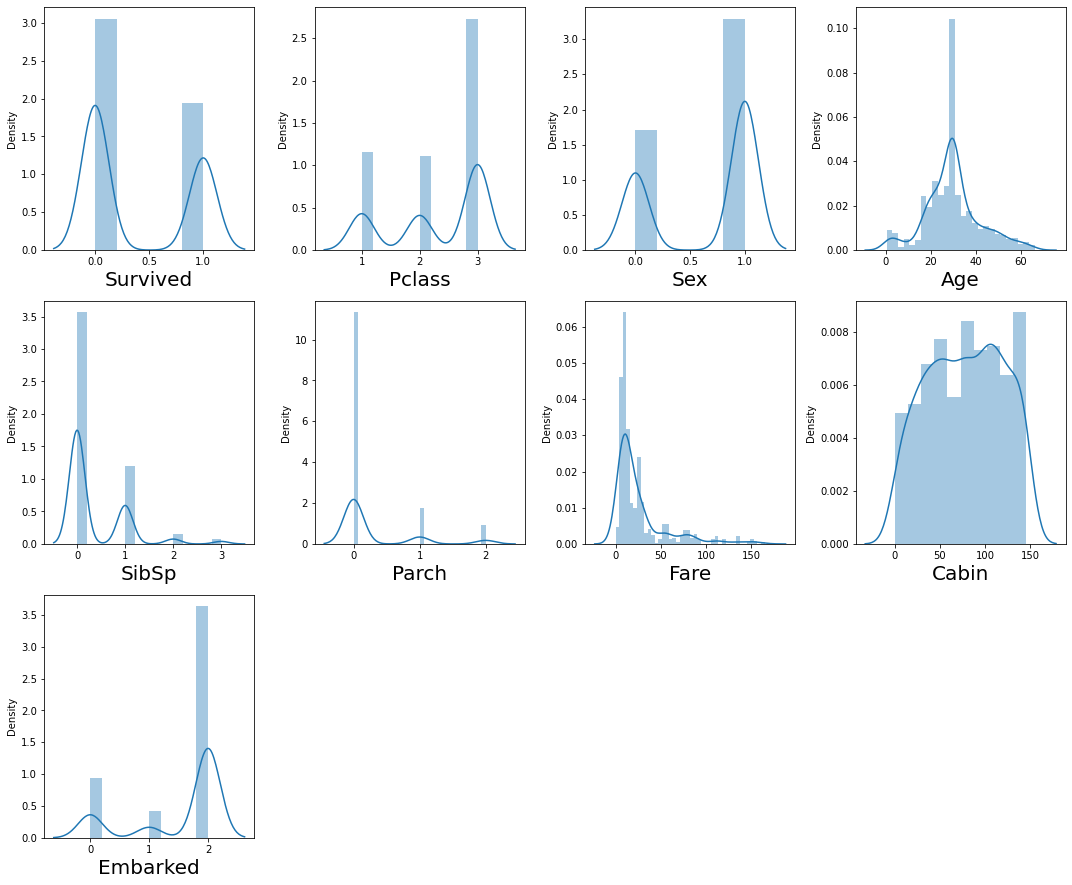

In [24]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

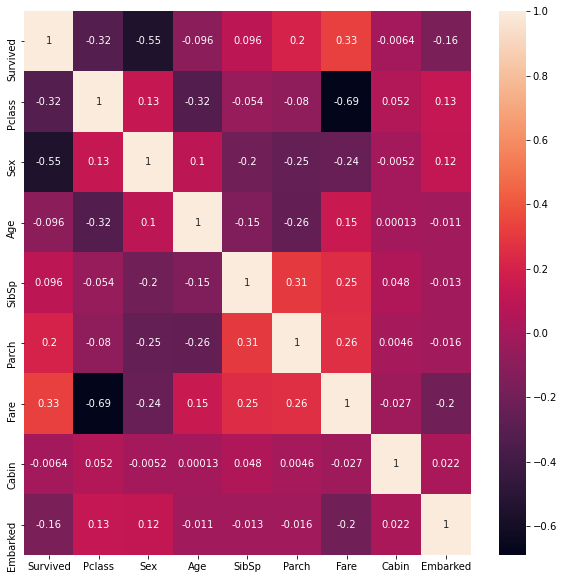

In [25]:
# lets check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [26]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=df.drop(columns=['Survived'])
y=df['Survived']

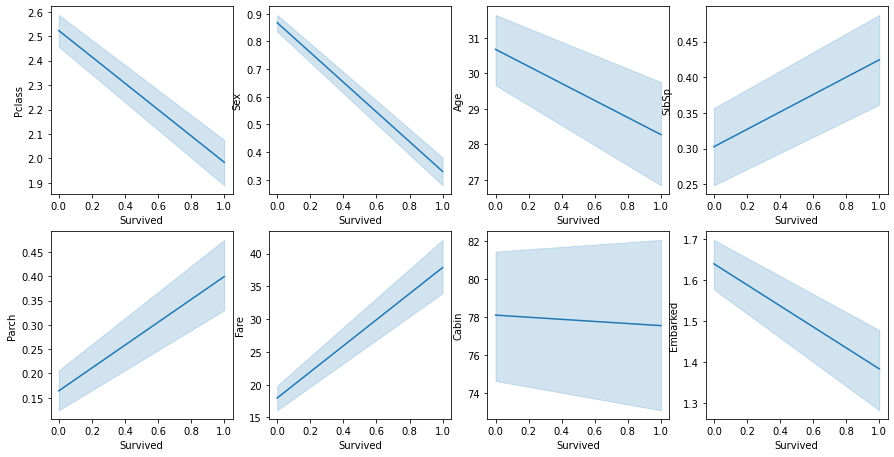

In [27]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [28]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [29]:
print(data['Survived'].value_counts()) # data is not imbalanced lets move further

0    548
1    340
Name: Survived, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.7908496732026143
at random sate 0, the testing accuracy is:- 0.8


at random sate 1, the training accuracy is:- 0.7908496732026143
at random sate 1, the testing accuracy is:- 0.7951219512195122


at random sate 2, the training accuracy is:- 0.7908496732026143
at random sate 2, the testing accuracy is:- 0.7853658536585366


at random sate 3, the training accuracy is:- 0.7761437908496732
at random sate 3, the testing accuracy is:- 0.8195121951219512


at random sate 4, the training accuracy is:- 0.7908496732026143
at random sate 4, the testing accuracy is:- 0.7902439024390244


at random sate 5, the training accuracy is:- 0.7843137254901961
at random sate 5, the testing accuracy is:- 0.824390243902439


at random sate 6, the training accuracy is:- 0.795751633986928
at random sate 6, the testing accuracy is:- 0.8


at random sate 7, the training accuracy is:- 0.815359477124183
at random sate 7, the testing accuracy is:- 0.7414634146341463


a

at random sate 79, the training accuracy is:- 0.795751633986928
at random sate 79, the testing accuracy is:- 0.7707317073170732


at random sate 80, the training accuracy is:- 0.803921568627451
at random sate 80, the testing accuracy is:- 0.751219512195122


at random sate 81, the training accuracy is:- 0.7826797385620915
at random sate 81, the testing accuracy is:- 0.8390243902439024


at random sate 82, the training accuracy is:- 0.7892156862745098
at random sate 82, the testing accuracy is:- 0.8


at random sate 83, the training accuracy is:- 0.7892156862745098
at random sate 83, the testing accuracy is:- 0.8


at random sate 84, the training accuracy is:- 0.7892156862745098
at random sate 84, the testing accuracy is:- 0.7951219512195122


at random sate 85, the training accuracy is:- 0.8022875816993464
at random sate 85, the testing accuracy is:- 0.775609756097561


at random sate 86, the training accuracy is:- 0.7892156862745098
at random sate 86, the testing accuracy is:- 0.80975

In [31]:
#Split data into train & test by using this new fetures
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=4)

In [32]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [33]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [34]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.7908496732026143
Test Report: 0.7902439024390244
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.75      0.72      0.74        83

    accuracy                           0.79       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.79      0.79      0.79       205

Confusion Matrix: [[102  20]
 [ 23  60]]
Accuracy: 79.08 %
Standard Deviation: 2.29 %


In [58]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.7853658536585366
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.85      0.83       122
           1       0.76      0.69      0.72        83

    accuracy                           0.79       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.79      0.78       205

Confusion Matrix: [[104  18]
 [ 26  57]]
Accuracy: 81.70 %
Standard Deviation: 0.65 %


In [36]:
# Model no.3
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.8464052287581699
Test Report: 0.8146341463414634
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       122
           1       0.80      0.72      0.76        83

    accuracy                           0.81       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.81      0.81       205

Confusion Matrix: [[107  15]
 [ 23  60]]
Accuracy: 80.23 %
Standard Deviation: 1.47 %


In [37]:
#Model no.4
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.697560975609756
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.68      0.73       122
           1       0.61      0.72      0.66        83

    accuracy                           0.70       205
   macro avg       0.69      0.70      0.69       205
weighted avg       0.71      0.70      0.70       205

Confusion Matrix: [[83 39]
 [23 60]]
Accuracy: 73.20 %
Standard Deviation: 3.27 %


In [38]:
#Model no.6
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.8529411764705882
Test Report: 0.775609756097561
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       122
           1       0.73      0.70      0.72        83

    accuracy                           0.78       205
   macro avg       0.77      0.76      0.77       205
weighted avg       0.77      0.78      0.77       205

Confusion Matrix: [[101  21]
 [ 25  58]]
Accuracy: 79.08 %
Standard Deviation: 0.00 %


In [65]:
# Hyper tuning by using RandomizedSearchCV With AdaBosstClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':range(2,60,2),'learning_rate':[0.25,0.1,0.3,0.4],'random_state':range(0,100,2)}
rand=RandomizedSearchCV(estimator=ada, cv=2,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'random_state': 2, 'n_estimators': 34, 'learning_rate': 0.3}

In [66]:
#Model no.6
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=98, n_estimators=22, learning_rate= 0.25)

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.8120915032679739
Test Report: 0.8
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       122
           1       0.78      0.70      0.74        83

    accuracy                           0.80       205
   macro avg       0.80      0.78      0.79       205
weighted avg       0.80      0.80      0.80       205

Confusion Matrix: [[106  16]
 [ 25  58]]
Accuracy: 80.88 %
Standard Deviation: 0.49 %


# Looking at ROC curve, accuracy score, confusion matrix & classification report with kfold cross validation the best model is AdaBoostClassifier with RandomizedSearchCV  Hypertuning parameter

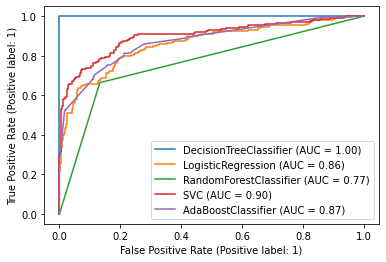

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)

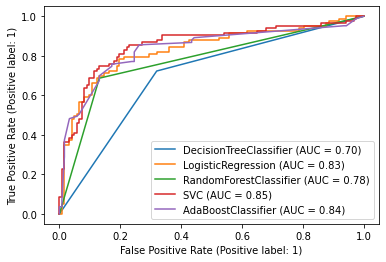

In [68]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)